In [220]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import torch
from torch import nn


In [193]:
dataset = load_iris()
X =dataset.data
y = dataset.target

In [199]:

class Attention(nn.Module):
    def __init__(self):
        super(Attention,self).__init__()
        
        self.k = torch.rand(4,4,requires_grad=True,dtype=torch.float32)
        self.q = torch.rand(4,4,requires_grad=True,dtype=torch.float32)
        self.v = torch.rand(4,4,requires_grad=True,dtype=torch.float32)
        
        self.fc1 = nn.Linear(16,3)
        
        self.softmax = nn.Softmax(dim=0)
    
    def forward(self,X):
        key_input = self.k * X
        query_input = self.q * X
        value_input = self.v * X
        
        dv_dot = torch.matmul(query_input, key_input)
        k_dim = np.sqrt(self.k.shape[0])
        
        output = torch.matmul(self.softmax(dv_dot/k_dim) , value_input)
        
        output = output.view(-1).float()

        output = self.fc1(output)
        output = self.softmax(output)
        
        return output

In [200]:
network = Attention()
print(network)

Attention(
  (fc1): Linear(in_features=16, out_features=3, bias=True)
  (softmax): Softmax(dim=0)
)


In [201]:
output = network(torch.tensor(X[0]))

In [197]:
output

tensor([0.1079, 0.2120, 0.6801], grad_fn=<SoftmaxBackward>)

In [212]:
creatrion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters())


In [213]:
print(loss)

tensor(0.6275, grad_fn=<NllLossBackward>)


In [221]:
# training
losses = []
for i in range(1):
    for i in range(X.shape[0]):
        
        output = network(torch.tensor(X[i]))

        loss = creatrion(output.view(1,-1),torch.tensor([y[i]]))
        
        optimizer.zero_grad()   # zero the gradient buffers

        loss.backward()
        optimizer.step() 
        losses.append(loss.item())
        print(loss.item())
        

0.5854195952415466
0.6142747402191162
0.5972210168838501
0.6137183904647827
0.5805282592773438
0.587422788143158
0.5961020588874817
0.5903769731521606
0.6210015416145325
0.5984545350074768
0.5757315754890442
0.5926021933555603
0.5983081459999084
0.5891938209533691
0.5624457001686096
0.5644772052764893
0.5712043642997742
0.5820847749710083
0.5770754814147949
0.5740455985069275
0.5871396064758301
0.5807629823684692
0.5671802759170532
0.6173521280288696
0.5960275530815125
0.6041820049285889
0.5949201583862305
0.5752028226852417
0.5755466222763062
0.5916351079940796
0.5956289768218994
0.5852882266044617
0.5598660111427307
0.5589418411254883
0.5885729789733887
0.575333297252655
0.5673789978027344
0.5656686425209045
0.5878850221633911
0.5739697813987732
0.5708563923835754
0.651972770690918
0.5779752135276794
0.5924584269523621
0.5772421360015869
0.5910053849220276
0.5645282864570618
0.5774657726287842
0.5640832185745239
0.5719183683395386
1.2792136669158936
1.293272852897644
1.34776496887207

In [222]:
%matplotlib inline

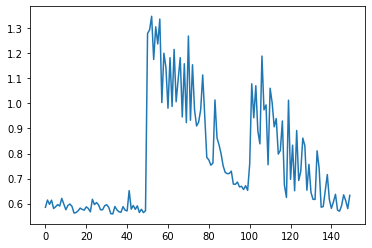

In [223]:
plt.plot(losses)